### Problem Initial
The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population that starts with only white daisies.

1.  Add a relatively small (5\%, blackconc = 0.05) initial fraction of black daisies to the
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?

2.  Set the initial black daisy population to 0.05 Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. What value of initial white daisy population gives you a non-zero steady state for blackconc=0.05? Do you have to increase or decrease the initial fraction? What is your explanation for this behavior?

3.  Experiment with other initial fractions of daisies and look for
    non-zero steady states. Describe and explain your results. Connect what you see here with the discussion of hysteresis towards the end of this lab - what determines which steady state is reached? 

In [143]:
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
#
from numlabs.lab5.lab5_funs import Integrator


class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions

            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f

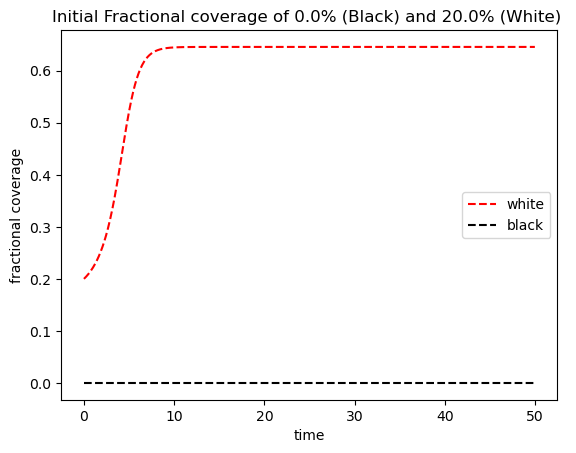

In [144]:
import pandas as pd

theSolver = Integ54('initial.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('Initial Fractional coverage of '+ str((daisies['black'][0])*100)+'% (Black) and ' + str((daisies['white'][0])*100)+'% (White) ')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')

In [145]:
temp=np.zeros(shape=(len(timevals),3))
for i in range(len(timevals)):
    temp[i,:]=theSolver.find_temp(yvals[i])

Text(0.5, 1.0, 'Initial Fractional coverage of 0.0% (Black) and 20.0% (White) ')

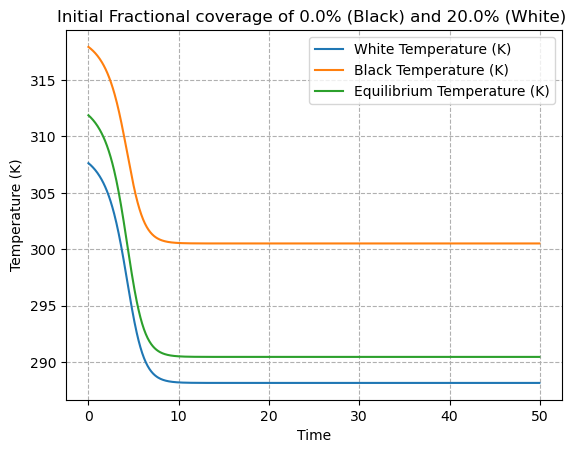

In [146]:
plt.plot(timevals,temp[:,0],label='White Temperature (K)')
plt.plot(timevals,temp[:,1],label='Black Temperature (K)')
plt.plot(timevals,temp[:,2],label='Equilibrium Temperature (K)')
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Temperature (K)')
plt.xlabel('Time')
plt.title('Initial Fractional coverage of '+ str((daisies['black'][0])*100)+'% (Black) and ' + str((daisies['white'][0])*100)+'% (White) ')


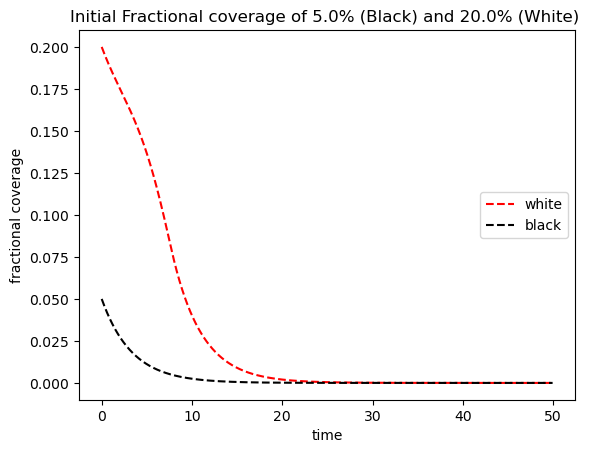

In [147]:
import pandas as pd

theSolver = Integ54('initial-modified_1.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('Initial Fractional coverage of '+ str((daisies['black'][0])*100)+'% (Black) and ' + str((daisies['white'][0])*100)+'% (White) ')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')

Text(0.5, 1.0, 'Initial Fractional coverage of 5.0% (Black) and 20.0% (White) ')

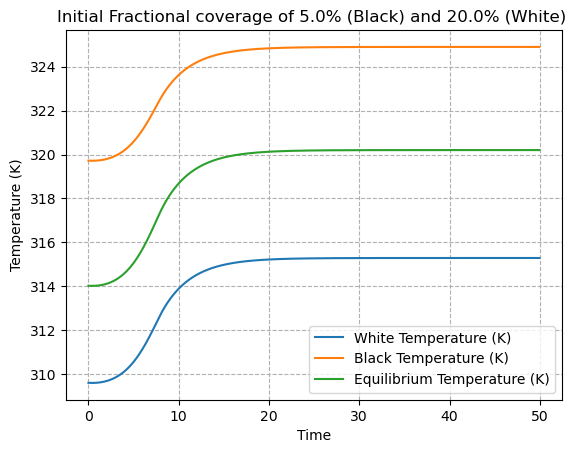

In [148]:
temp=np.zeros(shape=(len(timevals),3))
for i in range(len(timevals)):
    temp[i,:]=theSolver.find_temp(yvals[i])
#
plt.plot(timevals,temp[:,0],label='White Temperature (K)')
plt.plot(timevals,temp[:,1],label='Black Temperature (K)')
plt.plot(timevals,temp[:,2],label='Equilibrium Temperature (K)')
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Temperature (K)')
plt.xlabel('Time')
plt.title('Initial Fractional coverage of '+ str((daisies['black'][0])*100)+'% (Black) and ' + str((daisies['white'][0])*100)+'% (White) ')

1.- If I change the initial fraction of the Black Daisies to 5% (0.05), then I get a decreasing fractional coverage for both Black and White Daisies, which ends with a final population of 0 Daisies.

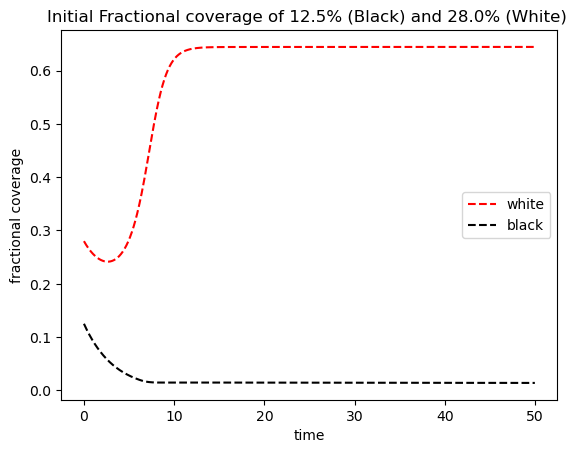

In [149]:
import pandas as pd

theSolver = Integ54('initial-modified_2.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('Initial Fractional coverage of '+ str((daisies['black'][0])*100)+'% (Black) and ' + str(np.round(daisies['white'][0]*100,2))+'% (White) ')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')

In [150]:
print('This configuration of fraction coverage takes a non-zero final steady state solution with a White Daisies fraction of ' + str(daisies['white'][999]) + ' and a Black Daisies fraction of ' + str(daisies['black'][999]) + '. So, even if it is almost zero, it is the only fraction coverage configuration that I found for having a non-zero steady state for both Black and White Daisies.')

This configuration of fraction coverage takes a non-zero final steady state solution with a White Daisies fraction of 0.6444265618217333 and a Black Daisies fraction of 0.014010137061542551. So, even if it is almost zero, it is the only fraction coverage configuration that I found for having a non-zero steady state for both Black and White Daisies.


Text(0.5, 1.0, 'Initial Fractional coverage of 12.5% (Black) and 28.0% (White) ')

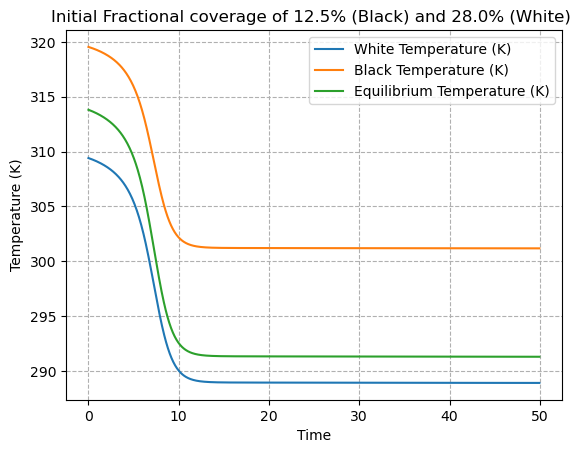

In [151]:
temp=np.zeros(shape=(len(timevals),3))
for i in range(len(timevals)):
    temp[i,:]=theSolver.find_temp(yvals[i])
#
plt.plot(timevals,temp[:,0],label='White Temperature (K)')
plt.plot(timevals,temp[:,1],label='Black Temperature (K)')
plt.plot(timevals,temp[:,2],label='Equilibrium Temperature (K)')
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Temperature (K)')
plt.xlabel('Time')
plt.title('Initial Fractional coverage of '+ str((daisies['black'][0])*100)+'% (Black) and ' + str(np.round(daisies['white'][0]*100,2))+'% (White) ')


2.- I set an initial fraction of 20.5% (0.205) for the White Daisies, which is slightly higher than the initial fraction used before (0.2) and it results in a non-zero final population of Daisies.

Both Black and White Daisies start decreasing from their initial fractions. But, when the black daisies fraction reache values close or equal to zero, the white daisies start increasing, leading to a non-zero final population.

Try to find steady state for both, instead of just steady state for white or black daisies